# Data Analysis On BigBasket

Importing Major Libraries

In [69]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup

Importing CSV file

In [70]:


df = pd.read_csv('Big Basket Products')

In [71]:
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [72]:
df.head(12)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


Checking Information

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


Description of Data

In [74]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27549.000000,27555.000000,18919.000000
mean,13778.00000,334.648391,382.056664,3.943295
std,7954.58767,1202.102113,581.730717,0.739217
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,112475.000000,12500.000000,5.000000


Checking Null Values

In [75]:
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         6
market_price       0
type               0
rating          8636
description      115
dtype: int64

In [76]:
#Total Null Values
df.isnull().sum().sum()

8759

Filling Null Values of "sale_price" and "rating" with mean while "description" with 'Unknown'

In [77]:
df.sale_price = df.sale_price.fillna(df.sale_price.mean())
df.rating = df.rating.fillna(df.rating.mean())
df.description = df.description.fillna('Unknown')

In [78]:
df.isnull().sum()

index           0
product         1
category        0
sub_category    0
brand           1
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

Using dropna for droping missing values of "product" and "brand"

In [79]:
df = df.dropna()

In [80]:
df.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

Checking Outliers of Data

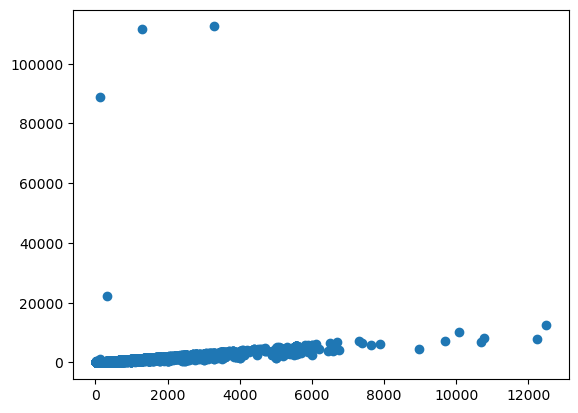

In [81]:
plt.scatter(df.market_price,df.sale_price)

# Visualization of data

Visualization of "market_price" with Distplot

<Axes: xlabel='market_price', ylabel='Density'>

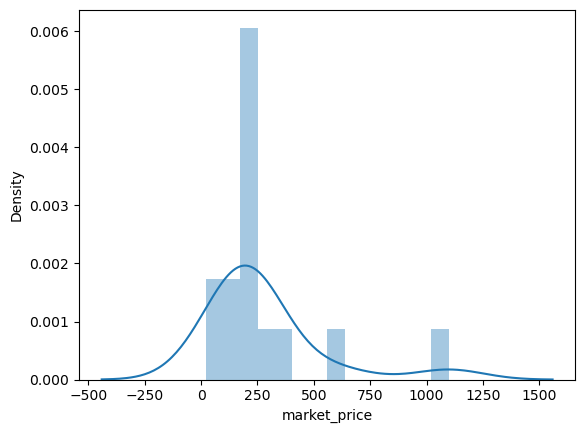

In [82]:
sns.distplot(df.market_price.head(15))

Using Barplot for comparision of "rating" and "market_price"

<Axes: xlabel='rating', ylabel='market_price'>

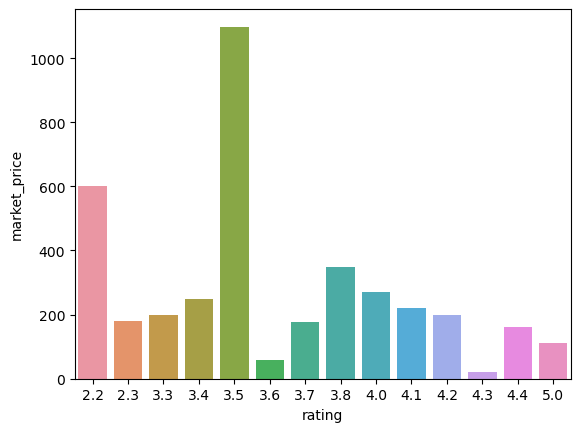

In [83]:
sns.barplot(x=df.rating.head(15),y=df.market_price.head(15),ci=True)

Pairplot of whole Data

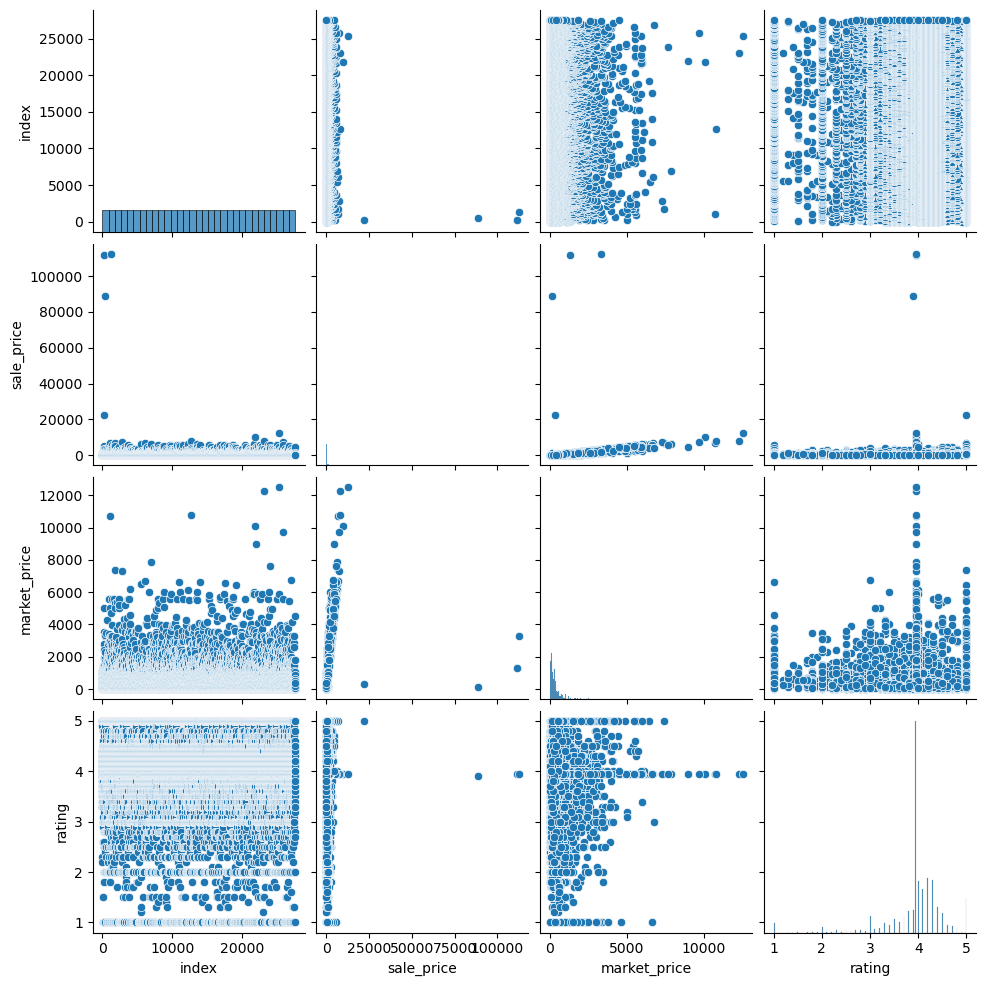

In [84]:
sns.pairplot(df)

Comparision of "market_price" with "Brand"

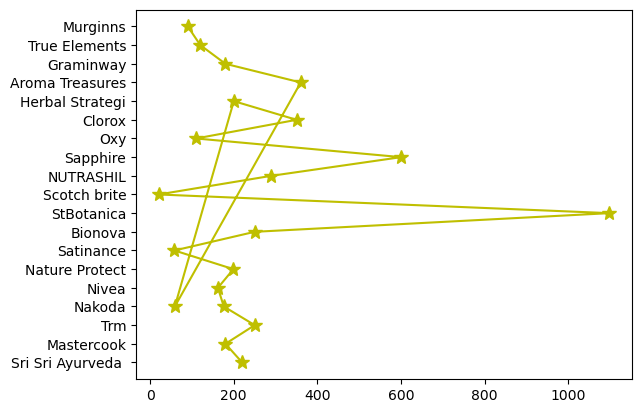

In [85]:
plt.plot(df.market_price.head(20),df.brand.head(20),marker='*',ms=10,color='y')

Comparision of "type" and "market_price" with the help of Bar Graph

<BarContainer object of 20 artists>

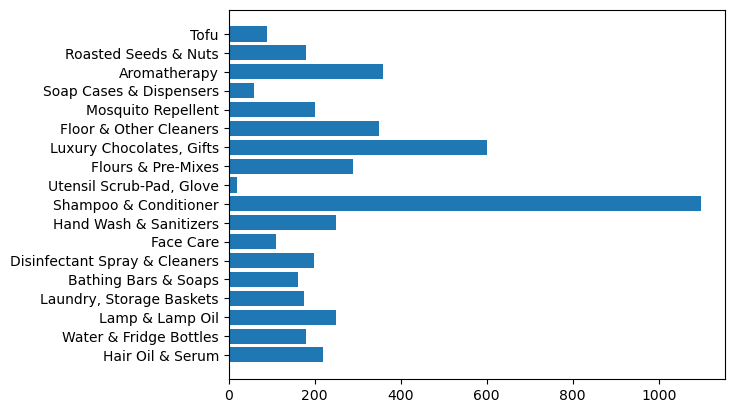

In [86]:
plt.barh(df.type.head(20),df.market_price.head(20))

Using stripplot  for "category" and "rating"

<Axes: xlabel='rating', ylabel='category'>

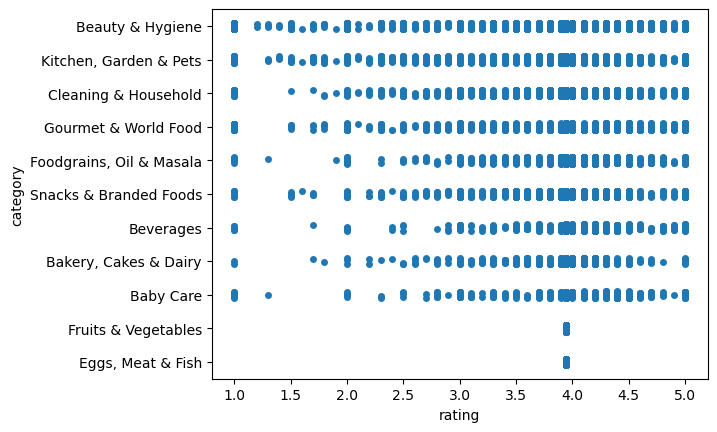

In [87]:
sns.stripplot(y=df.category,x=df.rating)

Lineplot for "rating" and "Category"

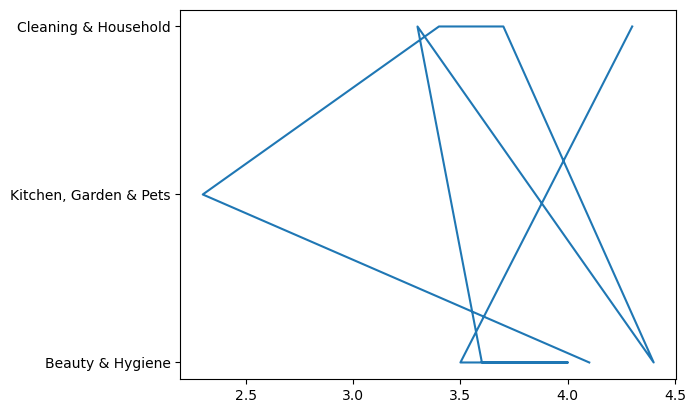

In [88]:
plt.plot(df.rating.head(10),df.category.head(10))

Using Pie chart for visualization of "Category"

([<matplotlib.patches.Wedge at 0x274901d0d90>,
 [Text(0.6863569326586179, 0.8596011639076891, 'Beauty & Hygiene'),
  Text(-0.7561758329465085, 0.7988730247465201, 'Gourmet & World Food'),
  Text(-1.0907042659615804, -0.14270320323387994, 'Kitchen, Garden & Pets'),
  Text(-0.7183973212234398, -0.8330097771689033, 'Snacks & Branded Foods'),
  Text(-0.09413924344701852, -1.0959643255340126, 'Foodgrains, Oil & Masala'),
  Text(0.5506878497368088, -0.9522304826838143, 'Cleaning & Household'),
  Text(0.8817846264784615, -0.6576137715302505, 'Beverages'),
  Text(0.9938320471603472, -0.47148474210420993, 'Bakery, Cakes & Dairy'),
  Text(1.0582531921430387, -0.30016692242662096, 'Baby Care'),
  Text(1.0887215049932435, -0.15711614991861023, 'Fruits & Vegetables'),
  Text(1.0991242072997547, -0.04388595364904166, 'Eggs, Meat & Fish')],
 [Text(0.3743765087228825, 0.46887336213146674, '28.6%'),
  Text(-0.41245954524355005, 0.43574892258901093, '17.0%'),
  Text(-0.5949295996154075, -0.0778381108548

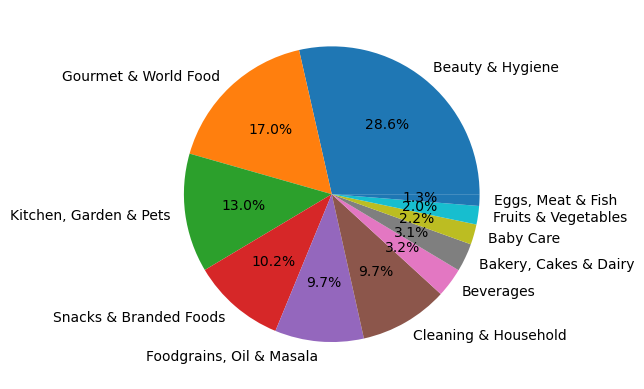

In [89]:
plt.pie(df.category.value_counts(),labels=df.category.value_counts().index,autopct='%1.1f%%')

Scatter plot shows Outliers of "rating" and "sales_price"

Text(0.5, 1.0, 'rating w.r.t sale_price')

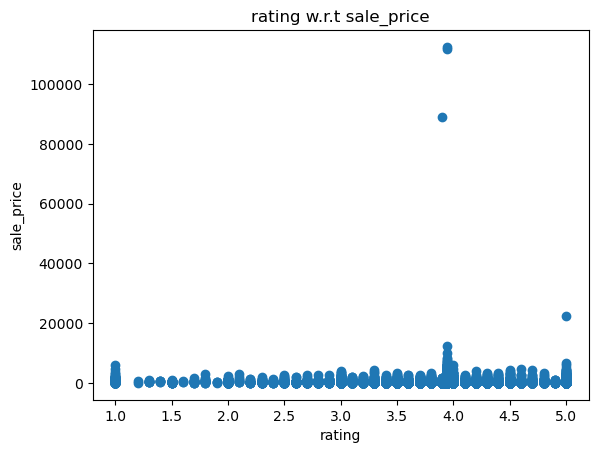

In [90]:
plt.scatter(x=df.rating,y=df.sale_price)
plt.xlabel('rating')
plt.ylabel('sale_price')
plt.title('rating w.r.t sale_price')

Histogram shows Visualization of "rating"

<Axes: xlabel='rating', ylabel='Count'>

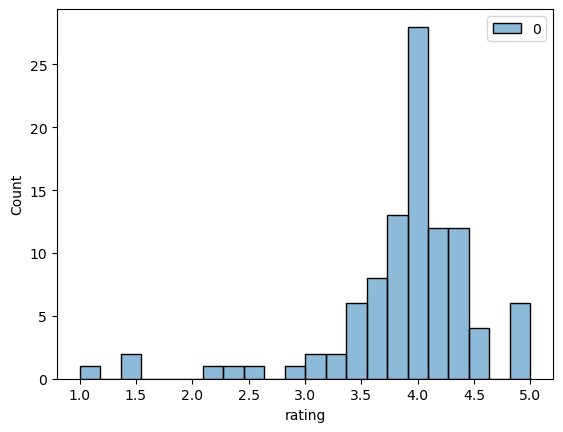

In [91]:
sns.histplot(x=df.rating.head(100),hue=0)

Comparision of "market_pricce" with "rating" from stripplot

<Axes: xlabel='rating', ylabel='market_price'>

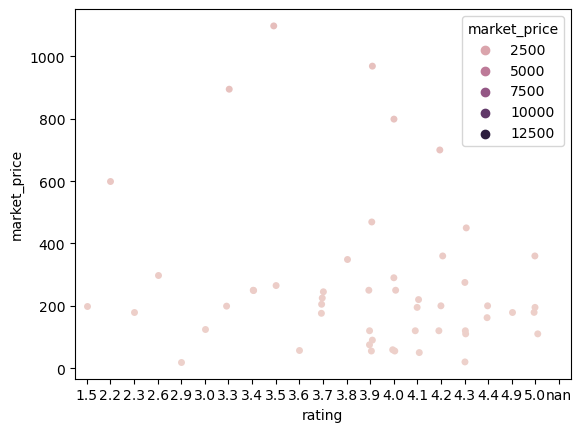

In [92]:

sns.stripplot(y=df.market_price,x=df.rating.head(50),hue=df.market_price)

Visualization of Heatmap shows correlation between two columns

<Axes: >

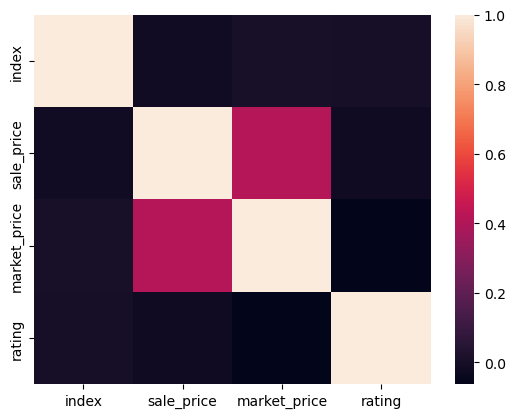

In [93]:
sns.heatmap(df.corr(numeric_only=True))

Kdeplot shows visualization of "market_price" also hueing "category" in it.

<Axes: xlabel='market_price', ylabel='Density'>

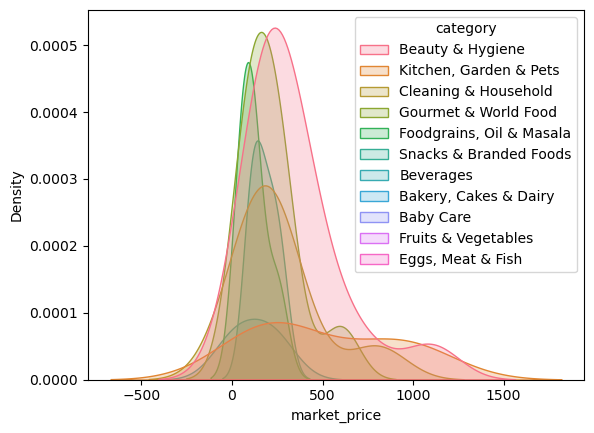

In [94]:
sns.kdeplot(data=df, x=df.market_price.head(50),hue='category',fill= True)

Countplot shows highest and lowest Big Basket orders.

<Axes: xlabel='rating', ylabel='count'>

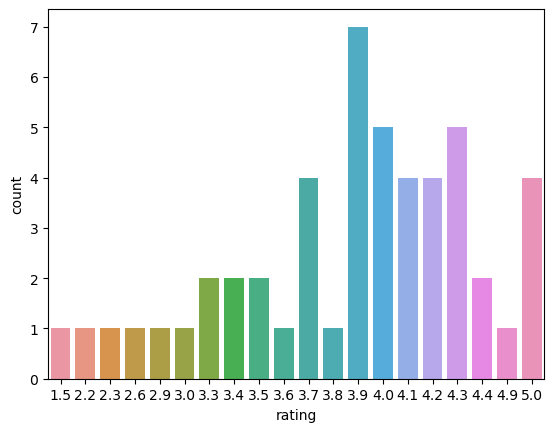

In [95]:
sns.countplot(x=df.rating.head(50))

# SUMMARY

In this whole Big Basket Data Analysis we have comapred and visualised diffrent category in this CSV file.Fistly major libraries were loaded in this project like:(Seaborn,Matplotlib,Panda,Numpy,etc.). Then next Csv File have been loaded.Checking and cleaning of Null Values were performed in this CSV File.Description and information of dataset were shown above in this project where we can get information about dataset.Completing all tasks then the most important part is to visualization of the dataset.

In the visualization of Big Basket Data Analysis we have performed diffrent types of Visualization with the help of Seaborn and Matplolib.Firstly we have found the outliers of the data.In the above visualization of scatterplot it shows that there were less numbers of outliers in the dataset.So it is asy to analyis the data of Big Basket.

In the visualization most of the Density of market price goes with "250" and most of the rating goes with "3.5". in this analysis i have analyised that most number of brand used by public is "StBotanica". So we we can analyse that Big Basket have to focus more on "StBotanica" due to higgest number of sales in that Brand.
But if I analyse most ordered product in that analysis. I have found that "Shampoo & Conditioner" is the most ordered product in Big Basket Analysis.Most of the rating is with shampoo & Conditioner with "4.0" ratings.But here we can see that most higgest ratings were given to the product which are related to the ("Cleaning & Households","Kitchen,Garden & Pets" and "Beauty & Hygiene") with 2.5 to 4.3 ratings.

In the next visualization which is pie chart i have found that top 3 most category product which were ordered by peoples were related to the "Beauty & Hygiene" with 28.6%, "Gourmet & World Food" with 17%, "Kitchen,Garden & Pets" with 13%. In that analysis it shows that mostly sales werte under the "20,000". In comparison with ratings a product which have rating of "4.0" and "More than 4.0" have higgest number of sales in Big Basket.